<a href="https://colab.research.google.com/github/jidatix/Developer-Stress-Level-Prediction/blob/main/stress_developer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('/content/developer_stress.csv')
df.head(5)

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Experience_Years,Code_Complexity,Remote_Work,Stress_Level
0,10,8,25,53,4,9,2,Senior,Medium,Yes,58.521033
1,7,8,33,33,2,6,9,Junior,Medium,Yes,47.461651
2,14,8,44,54,10,12,2,Junior,Low,No,59.211580
3,11,6,5,46,0,13,9,Mid,Low,Yes,100.000000
4,8,7,36,23,9,3,2,Junior,Medium,Yes,28.784957


In [ ]:
df.shape

(500, 11)

In [ ]:
df.isnull().sum()

,0
Hours_Worked,0
Sleep_Hours,0
Bugs,0
Deadline_Days,0
Coffee_Cups,0
Meetings,0
Interruptions,0
Experience_Years,0
Code_Complexity,0
Remote_Work,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Remote_Work'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Code_Complexity'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [ ]:
df['Experience_Years'].unique()

array(['Senior', 'Junior', 'Mid'], dtype=object)

In [ ]:
df['Remote_Work'] = df['Remote_Work'].map({'Yes': 1, 'No': 0})
df['Code_Complexity'] = df['Code_Complexity'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Experience_Years'] = df['Experience_Years'].map({'Junior': 1, 'Mid': 2, 'Senior': 3})

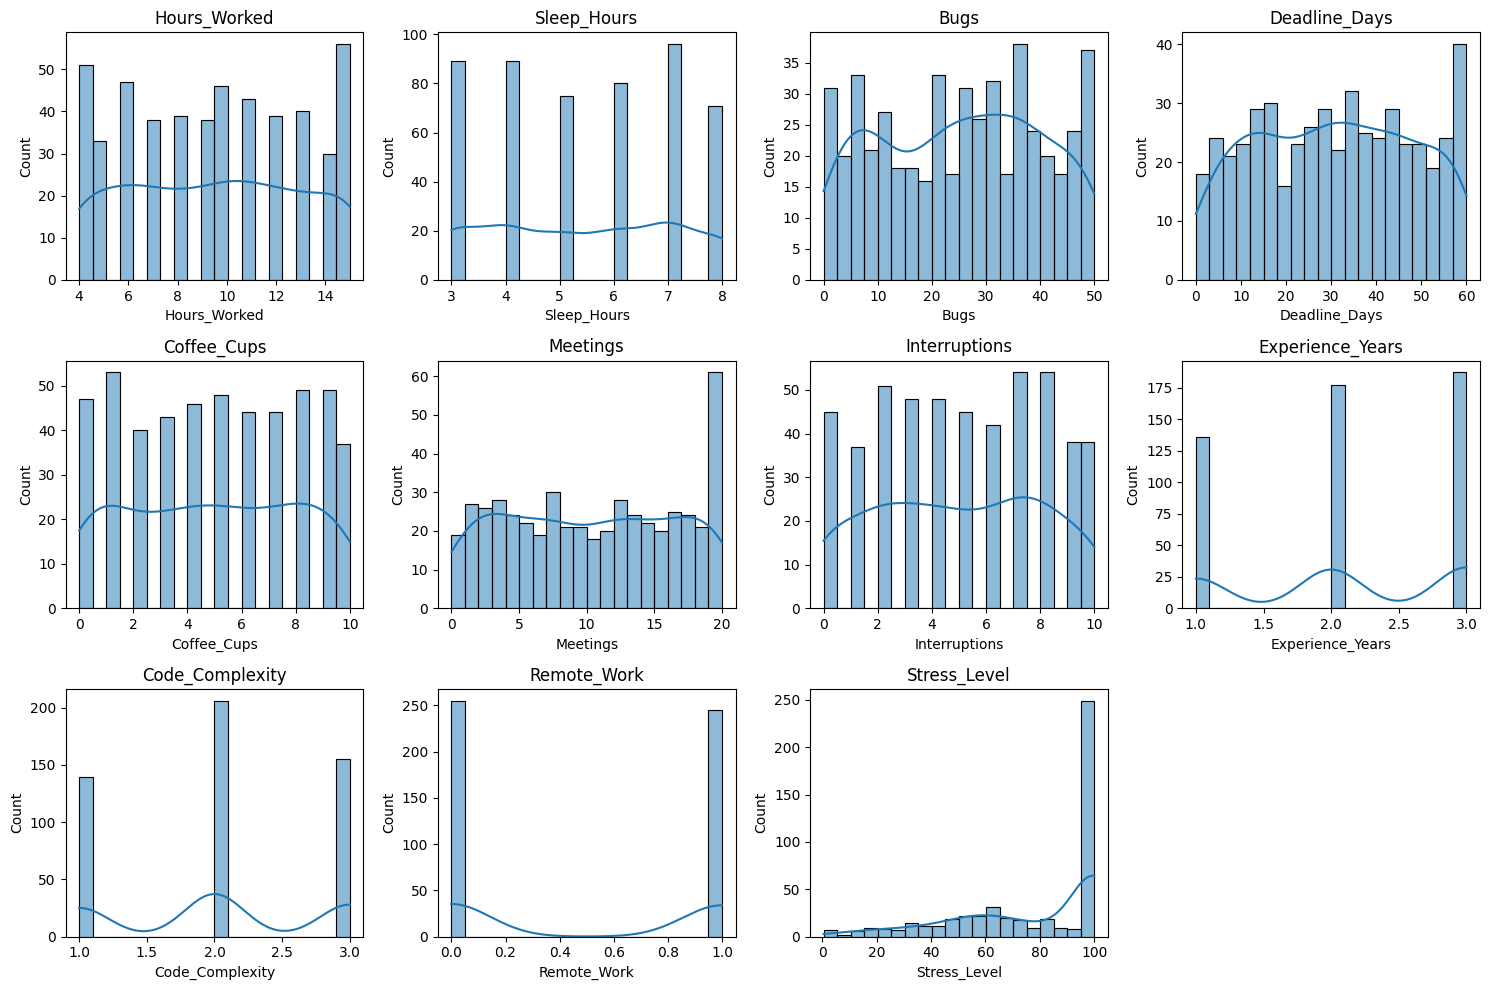

In [ ]:
# توزيع كل عمود رقمي
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


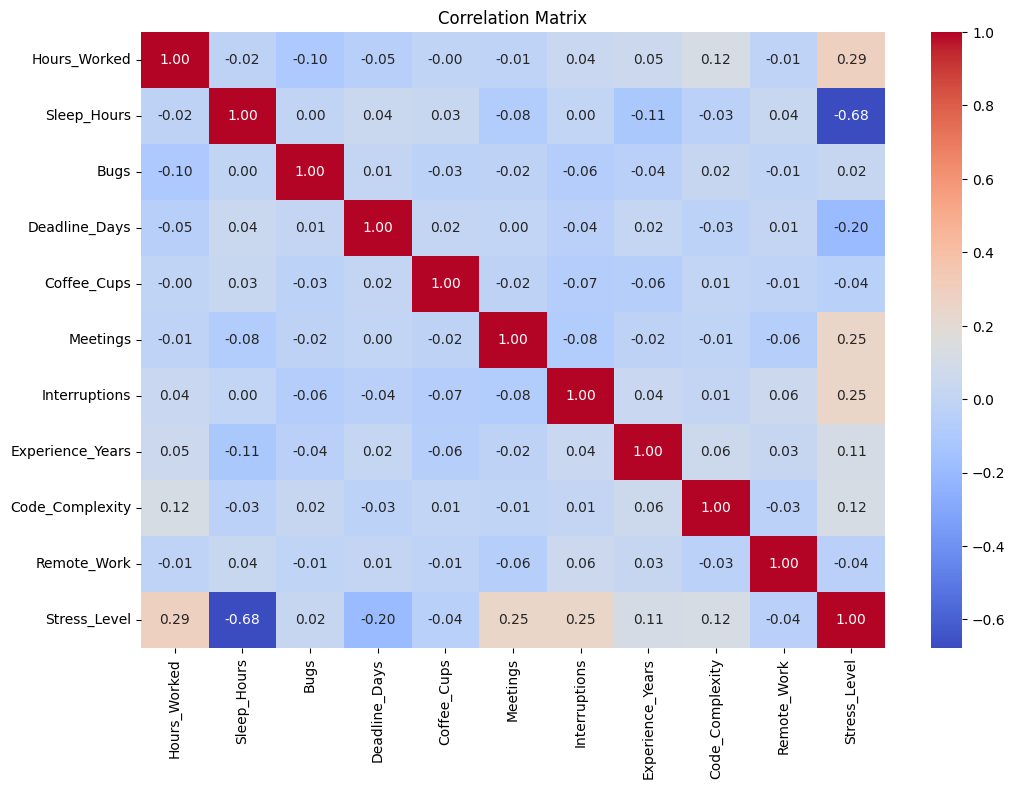

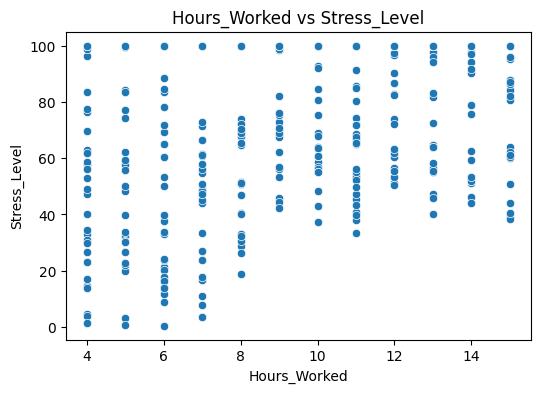

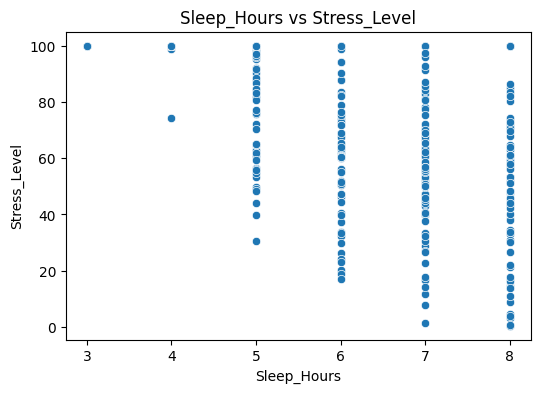

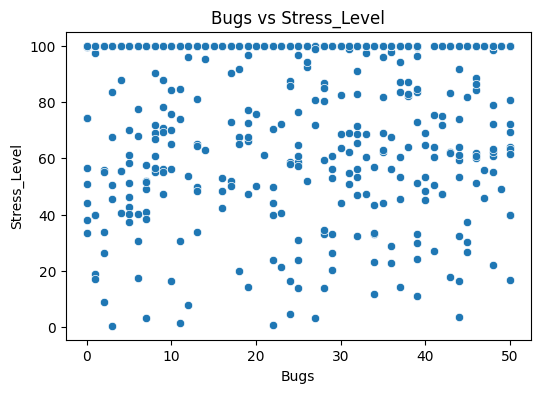

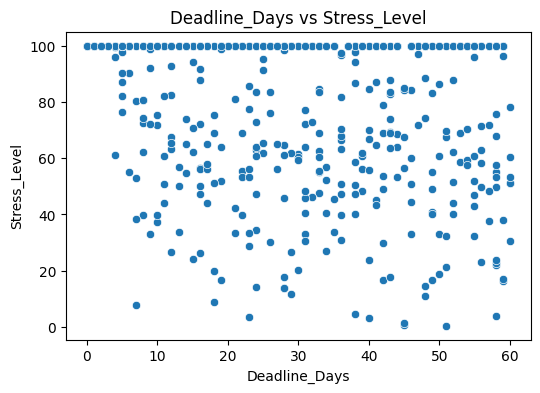

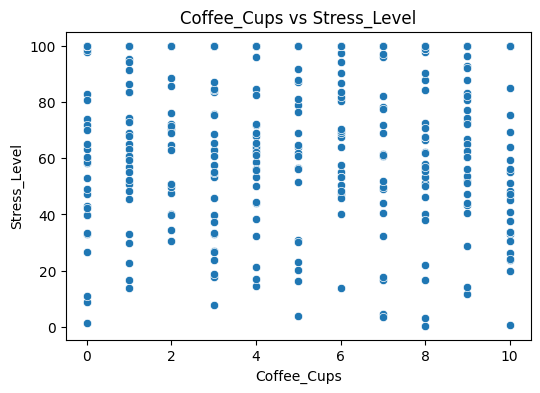

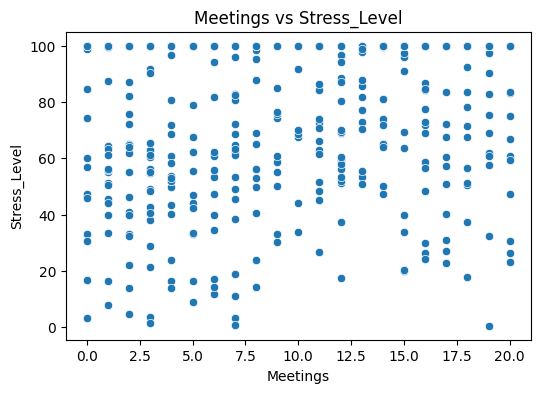

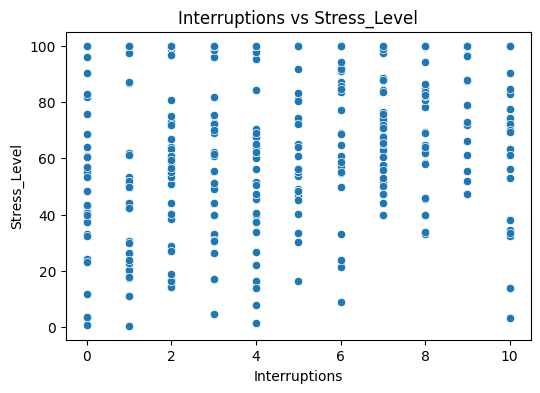

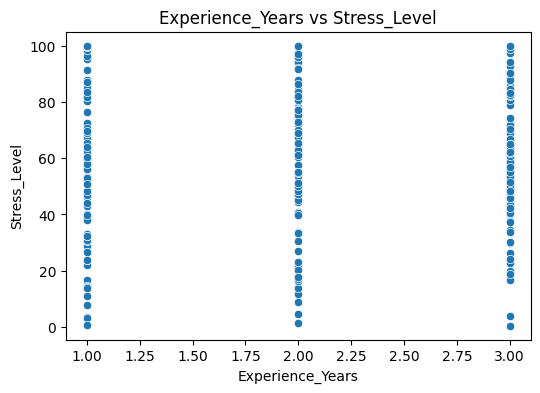

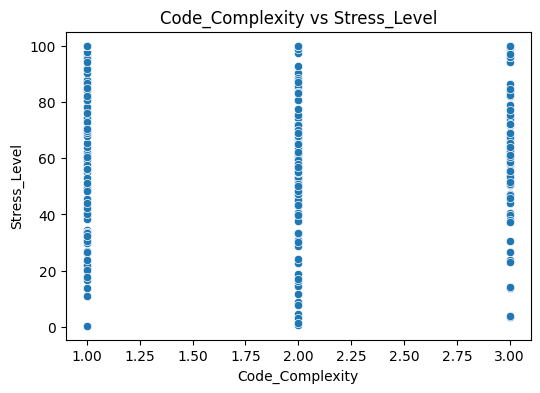

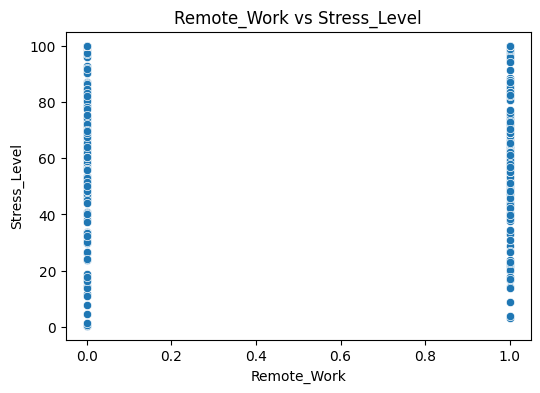

In [ ]:
# كورليشن ماتريكس
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# علاقة كل Feature بالـStress_Level
for col in numeric_cols:
    if col != 'Stress_Level':
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['Stress_Level'])
        plt.title(f'{col} vs Stress_Level')
        plt.show()


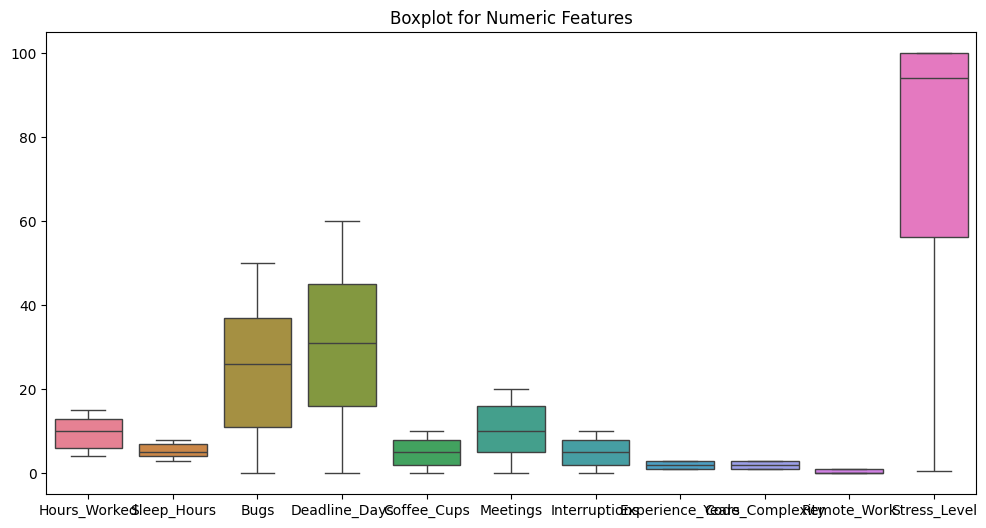

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Numeric Features")
plt.show()


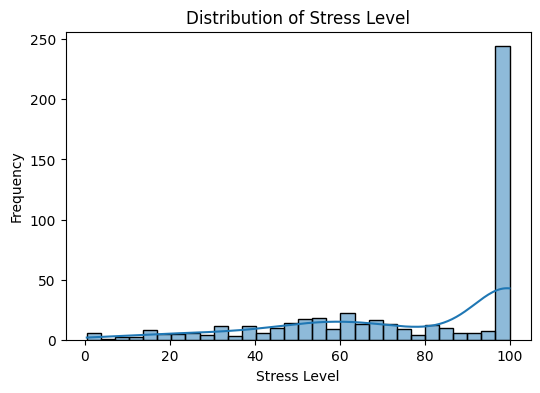

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Stress_Level'], bins=30, kde=True)
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

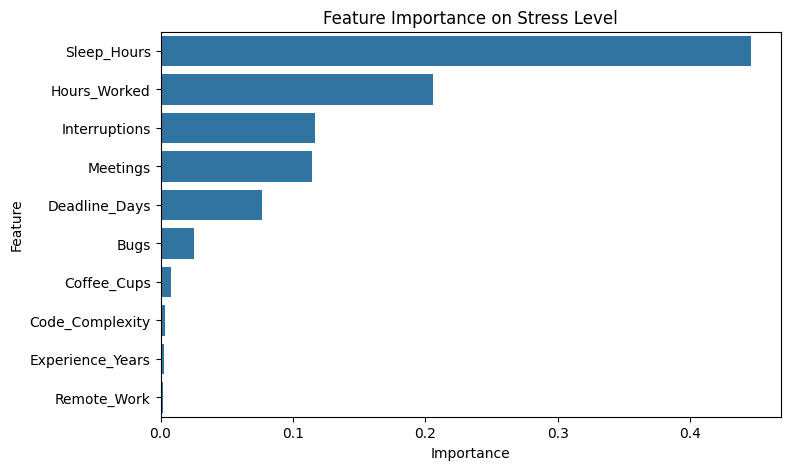

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance on Stress Level")
plt.show()

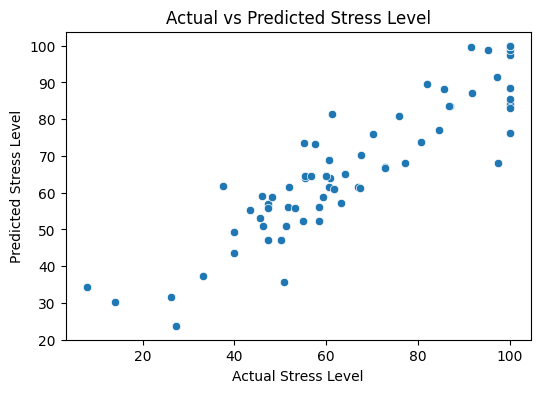

In [ ]:
y_pred = rf.predict(X_test)

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)


MAE  : 5.27591226447342
MSE  : 70.85917550245084
RMSE : 8.4177892289158
R²   : 0.8850681415962323


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("MAE  :", mae_lr)
print("RMSE :", rmse_lr)
print("R²   :", r2_lr)


Linear Regression Results
MAE  : 13.21124162085587
RMSE : 16.41539660716376
R²   : 0.5629339284288102


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [ ]:

y_pred_gbr = gbr.predict(X_test)


mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regression Results")
print("MAE  :", mae_gbr)
print("RMSE :", rmse_gbr)
print("R²   :", r2_gbr)


Gradient Boosting Regression Results
MAE  : 5.522373669012743
RMSE : 7.711740791360801
R²   : 0.9035395726784553


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Mapping categorical features
experience_map = {'Junior': 1, 'Mid': 2, 'Senior': 3}
code_map = {'Low': 1, 'Medium': 2, 'High': 3}
remote_map = {'Yes': 1, 'No': 0}


In [ ]:
def predict_stress(
    hours_worked, sleep_hours, bugs, deadline_days, coffee_cups,
    meetings, interruptions, experience_years, code_complexity, remote_work
):
    try:
        # Map categorical features
        exp_val = experience_map.get(experience_years)
        code_val = code_map.get(code_complexity)
        remote_val = remote_map.get(remote_work)

        if None in [exp_val, code_val, remote_val]:
            return "Error: Check categorical input values!"

        # Create input array
        input_data = np.array([[
            hours_worked, sleep_hours, bugs, deadline_days, coffee_cups,
            meetings, interruptions, exp_val, code_val, remote_val
        ]])

        # Scale numerical features (using existing scaler)
        input_scaled = scaler.transform(input_data)

        # Predict
        pred = gbr.predict(input_scaled)[0]
         # Limit Stress_Level to 100
        if pred > 100:
            pred = 100
        if pred < 0:
            pred = 0
          # Add Warning if Stress > 80
        if pred > 80:
            return f"⚠️ High Stress Level: {round(pred,2)}"
        else:
            return round(pred, 2)

        return round(pred, 2)

        # Return HTML string for Gradio
        return f"<div style='color: {color}; font-weight: bold; font-size:20px;'>Predicted Stress Level: {pred_rounded}</div>"

    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
iface = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Number(label="Hours Worked"),
        gr.Number(label="Sleep Hours"),
        gr.Number(label="Bugs"),
        gr.Number(label="Deadline Days"),
        gr.Number(label="Coffee Cups"),
        gr.Number(label="Meetings"),
        gr.Number(label="Interruptions"),
        gr.Dropdown(["Junior", "Mid", "Senior"], label="Experience Years"),
        gr.Dropdown(["Low", "Medium", "High"], label="Code Complexity"),
        gr.Dropdown(["Yes", "No"], label="Remote Work")
    ],
    outputs=gr.Textbox(label="Predicted Stress Level"),
    title="Developer Stress Predictor",
    description="Predict a developer's stress level (0-100) based on work conditions, habits, and experience."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b5cf712eb32792fe11.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
